<a href="https://colab.research.google.com/github/jsansao/dlvc/blob/main/Licao2bis_MLP_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [176]:
!wget https://github.com/jsansao/dlvc/raw/main/Licao2bis_MLP_XOR.tar.gz
!tar -zxvf Licao2bis_MLP_XOR.tar.gz

--2021-08-27 19:49:02--  https://github.com/jsansao/dlvc/raw/main/Licao2bis_MLP_XOR.tar.gz
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jsansao/dlvc/main/Licao2bis_MLP_XOR.tar.gz [following]
--2021-08-27 19:49:02--  https://raw.githubusercontent.com/jsansao/dlvc/main/Licao2bis_MLP_XOR.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54041 (53K) [application/octet-stream]
Saving to: ‘Licao2bis_MLP_XOR.tar.gz’

Licao2bis_MLP_XOR.t 100%[===================>]  52.77K  --.-KB/s    in 0.009s  

2021-08-27 19:49:02 (5.84 MB/s) - ‘Licao2bis_MLP_XOR.tar.gz’ saved [54041/54041]

train_label.csv
t

In [177]:
from numpy import genfromtxt
train_data = genfromtxt('train_data.csv', delimiter=',')
train_label = genfromtxt('train_label.csv', delimiter=',')

test_data = genfromtxt('test_data.csv', delimiter=',')
test_label = genfromtxt('test_label.csv', delimiter=',')


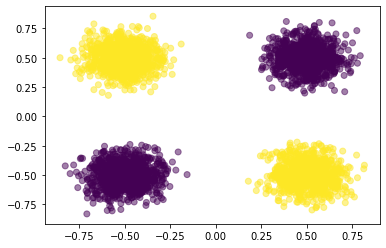

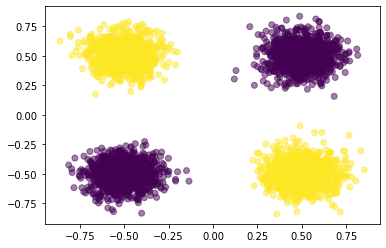

In [178]:
plt.scatter(train_data[:,0], train_data[:,1], c=train_label , alpha=0.5)
plt.show()
plt.scatter(test_data[:,0], test_data[:,1], c=test_label , alpha=0.5)
plt.show()

In [179]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[2])])
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

model.fit(train_data, train_label, epochs=50)

model.summary()

Epoch 1/50
125/125 [==============================] - 0s 1ms/step - loss: 0.3244 - accuracy: 0.5232
Epoch 2/50
125/125 [==============================] - 0s 995us/step - loss: 0.2569 - accuracy: 0.5000
Epoch 3/50
125/125 [==============================] - 0s 1ms/step - loss: 0.2519 - accuracy: 0.5000
Epoch 4/50
125/125 [==============================] - 0s 1ms/step - loss: 0.2507 - accuracy: 0.5140
Epoch 5/50
125/125 [==============================] - 0s 1ms/step - loss: 0.2503 - accuracy: 0.5165
Epoch 6/50
125/125 [==============================] - 0s 1ms/step - loss: 0.2502 - accuracy: 0.5265
Epoch 7/50
125/125 [==============================] - 0s 1ms/step - loss: 0.2502 - accuracy: 0.5767
Epoch 8/50
125/125 [==============================] - 0s 998us/step - loss: 0.2502 - accuracy: 0.4778
Epoch 9/50
125/125 [==============================] - 0s 1ms/step - loss: 0.2502 - accuracy: 0.5017
Epoch 10/50
125/125 [==============================] - 0s 1ms/step - loss: 0.2502 - accuracy: 0.

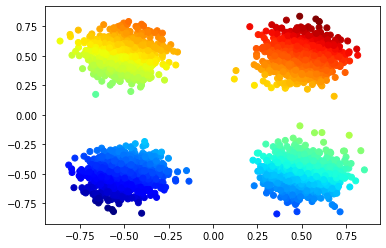

In [180]:
test_predict = model.predict(test_data)

plt.scatter(test_data[:,0], test_data[:,1], c=test_predict , cmap='jet')
plt.show()

In [181]:
model2 = tf.keras.Sequential([tf.keras.layers.Dense(16, activation=tf.nn.relu, input_shape=[2]),                                                                     
                              tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])
model2.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

#model2.fit(train_data, train_label, epochs=500)


history = model2.fit(train_data, train_label,
                    batch_size=20,
                    epochs=40,
                    verbose=1,
                    validation_data=(test_data, test_label))

model2.summary()

Epoch 1/40
200/200 [==============================] - 1s 3ms/step - loss: 0.2283 - accuracy: 0.8692 - val_loss: 0.2192 - val_accuracy: 0.9542
Epoch 2/40
200/200 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9770 - val_loss: 0.2017 - val_accuracy: 0.9890
Epoch 3/40
200/200 [==============================] - 1s 3ms/step - loss: 0.1930 - accuracy: 0.9940 - val_loss: 0.1852 - val_accuracy: 0.9985
Epoch 4/40
200/200 [==============================] - 0s 2ms/step - loss: 0.1769 - accuracy: 0.9998 - val_loss: 0.1696 - val_accuracy: 0.9998
Epoch 5/40
200/200 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 1.0000 - val_loss: 0.1551 - val_accuracy: 0.9998
Epoch 6/40
200/200 [==============================] - 1s 3ms/step - loss: 0.1478 - accuracy: 1.0000 - val_loss: 0.1416 - val_accuracy: 0.9998
Epoch 7/40
200/200 [==============================] - 1s 3ms/step - loss: 0.1349 - accuracy: 1.0000 - val_loss: 0.1292 - val_accuracy: 1.0000
Epoch 

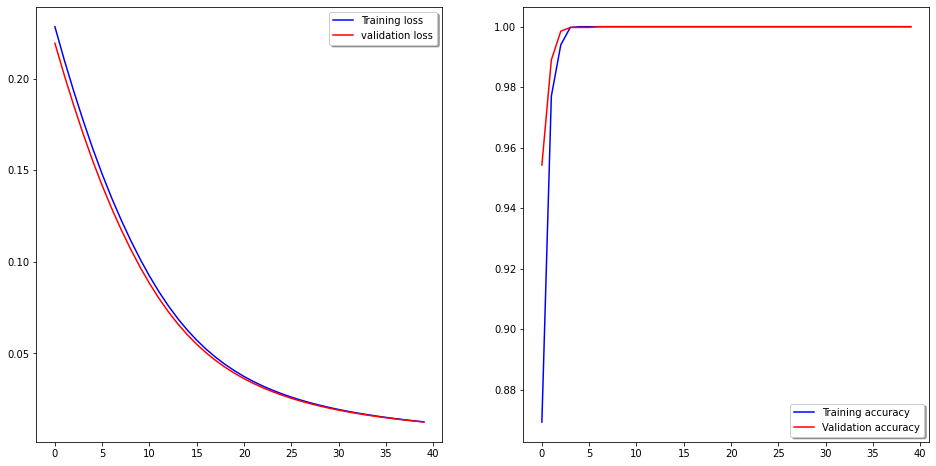

In [182]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)



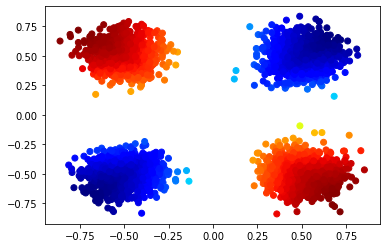

In [183]:

test_predict2 = model2.predict(test_data)

plt.scatter(test_data[:,0], test_data[:,1], c=test_predict2, cmap='jet')
plt.show()